# Trích xuất đặc trưng dựa trên Content-based.

# **1. Mục tiêu**

Với một thư điện tử bất kì, nhóm mong muốn có thể phân loại được thư điện tử đấy là an toàn (legimate)/ không an toàn (phishing)


# **2. Dữ liệu**

Trong project này, nhóm thu thập các tập dữ liệu các loại thư điện tử gồm nội dung và đã được gán nhãn (SpamAssassin, Kaggle, ...). Sau đó nhóm sẽ trích xuất các đặc trưng của các thư điện tử để tạo thành các vector đặc trưng để từ đó làm cơ sở phân loại.


Ta tiến hành tải dữ liệu đã tiền xử lý 

In [1]:
import pandas as pd

In [2]:
#loading the phishing URLs data to dataframe
data0 = pd.read_csv('/Users/HP/projectML/email_pre_processed.csv')
data0.head()

,text,spam
0,subject naturally irresistible corporate ident...,1
1,subject stock trading gunslinger fanny merrill...,1
2,subject unbelievable new home made easy im wan...,1
3,subject color printing special request additio...,1
4,subject money get software cd software compati...,1


In [3]:
data0.shape

(5728, 2)

# **3. Khai thác các đặc trưng**

Trong bước này, các đặc trưng được trích xuất từ bộ dữ liệu Email.

Các đặc trưng trích xuất được phân loại thành

1. Hình thức email
2. Từ ngữ
3. URL


In [4]:
import re
import numpy as np
import matplotlib.pyplot as plt
from spellchecker import SpellChecker

### **3.1 Hình thức email**

Nhiều đặc trưng có thể được trích xuất có thể được coi là đặc trưng cơ sở của hình thức email. Trong số đó, đề cập dưới đây đã được xem xét cho project này.

- Phần mở: Số các từ dear, hi
- Phần kết: Các đặc trung về chữ ký tên, về các từ kết thúc, Kèm thông tin về SDT
- Bố cục : các đặc trưng về Chuyển tiếp, reply

Mỗi đặc trưng này được trình bày và code ở dưới:


In [5]:
def haveFormalWord(email):
    formal_words = ['hi', 'dear', 'best', 'wishes', 'regard','dict','reply']
    for word in formal_words:
        if word in email.lower():
            return 0
    return 1 

In [6]:
def response(email):
    response_words = ['re', 'fw', 'fwd','cc', 'to']
    for word in response_words:
        if word in email.lower():
            return 0
    return 1 

### **3.2 Từ ngữ**

Nhiều đặc trưng có thể được trích xuất thuộc danh mục này. Trong số đó, đề cập dưới đây đã được xem xét cho project này.

- Chính tả trong từ điển tiếng Anh
- Blacklist:{verify, account, password,access, limitted, risk, security, service, suspend, allow, click, information, risk, credit, minutes, only, last,review,cost, fail, immediate, now, winner, best,any, passion, interest, late, soon, help, update, confirm }
- Kí tự đặc biệt: {%,$,#,?,!}
- Con số: số lượng các số

Mỗi đặc trưng này được trình bày và code ở dưới:


In [7]:
# Check number of misspelled words
def misspelledWord(email):
    spell = SpellChecker()
    words = re.findall(r'\w+', email)
    misspelled = spell.unknown(words)
    return len(misspelled) 

In [8]:
 # Check if the email has typos or bad grammar
def badGrammar(email):
    if len(re.findall(r'[\w]+', email)) > 2:
        return 1
    else:
        return 0

In [9]:
# Extract common phishing keywords
def keyword(email):
    keywords = [ "login",'account', 'alert', 'verify', 'bank', 'price', 'security', "suspend",'fraud', 'urgent', 'warning', 'limited', 'update', 'visit','buy', 'confirm','ready',  'offer', 'rely','information']
    for keyword in keywords:
        if keyword in email.lower():
            return 1
        else:
            return 0

In [10]:
# Check if the email asks for personal or financial information
def requestInfo(email):
    # Check if the email asks for personal or financial information
    personal_info = ['password', 'pin', 'ssn', 'social security', 'credit', 'debit', 'card number', 'card expiration', 'cvv']
    for info in personal_info:
        if info in email.lower():
            return 1
        else:
            return 0

In [11]:
# Check if the email includes a sense of Urgency
def senseUrgency(email):
    urgency_words = ['hurry', 'urgent', 'limited','time', 'act', 'now', 'time', 'running out', 'chance', "don't", 'miss', 'one time offer', 'only', 'few', 'final', 'sale', 'today', 'click']
    for word in urgency_words:
        if word in email.lower():
            return 1
        else:
            return 0

In [12]:
 # Check if the email includes a sense of 
def senseThreat(email):
    threat_words = ['sue', 'arrest', 'lawsuit', 'overdue', 'expired', 'dispute', 'emergency']
    for word in threat_words:
        if word in email.lower():
            return 1
        else:
            return 0

In [13]:
# Check the length of the email
def longEmail(email):
    if len(email) > 500:
        return 1
    else:
        return 0

In [14]:
# Check number of special characters
def numSpecialChar(email):
    num_special_chars = len(re.findall(r'[!@#$%^&*()\-_=+{};:,<.>/?[\]\\|~`]', email))
    return num_special_chars

In [15]:
# Check number of digits
def numDigit(email):
    num_digits = len(re.findall(r'\d', email))
    return num_digits

In [16]:
# Check number of character 
def numChar(email):
    char=0
    for i in email:
        if i.isalpha():
            char=char+1
    return char

In [17]:
def numWord(email):
    word=1
    for i in email:
        if(i==' '):
            word=word+1
    return word

### **3.3 URL**

Nhiều đặc trưng có thể được trích xuất thuộc danh mục này. Trong số đó, đề cập dưới đây đã được xem xét cho project này.

- Tên miền: Số hay là chữ
- Độ dài miền: Ngắn/dài
- Chuẩn HTTP: có/ không
- Số dot trong domain
- Redirection "//" trong URL
- Ký tự '-' trong miền

Mỗi đặc trưng này được trình bày và code ở dưới:


In [18]:
def numLink(email):
    # Check if number of links
    num_of_links = len(re.findall(r"http", email))
    return num_of_links

In [19]:
def suspiciousLink(email):
    # Check if the email has suspicious link
    # links = re.find(r"(http?://\S+)", email)
    # if links:
    #     for link in links:
    #         if  '-' in link or 'paypal' in link or 'bank' in link or 'irs' in link or 'amazon' in link or 'ebay' in link:
    #             return 1
    #         else:
    #             return 0
    # else:
    #     return 0
    num_suspicious_link = 0
    if 'http' in email and 'https' not in email:
        num_suspicious_link +=1
    return num_suspicious_link

In [20]:
def numDot(email):
    num_dot = 0
    # Check if the link in email has dot
    links = re.findall(r"http", email)
    for link in links:
        num_dot += len(re.findall(r".", link))
    return num_dot

# **4. Danh sách các đặc trưng**

Tạo một danh sách và một hàm gọi các hàm khác và lưu trữ tất cả các đặc trưng của email trong danh sách. Chúng tôi sẽ trích xuất các đặc trưng của từng email và thêm vào danh sách này.


In [21]:
def extract_features(email,label):
    features = []
    
    features.append(haveFormalWord(email))
    features.append(response(email))
    features.append(misspelledWord(email))
    features.append(badGrammar(email))
    features.append(keyword(email))
    features.append(requestInfo(email))
    features.append(senseUrgency(email))
    features.append(senseThreat(email))
    features.append(longEmail(email))
    features.append(numSpecialChar(email))
    features.append(numDigit(email))
    features.append(numChar(email))
    features.append(numWord(email)) 
    features.append(numLink(email))
    features.append(suspiciousLink(email))
    features.append(numDot(email))
    features.append(label)

    return features

In [22]:
#Extracting the feautres & storing them in a list
features_list = []
# for email in data0:
for i in range(5728):
    email = data0['text'][i]
    # Add the email features to the list of all features
    features_list.append(extract_features(email, data0['spam'][i]))

# **5. Tệp dữ liệu cuối cùng**

Bây giờ, chúng ta có một khung dữ liệu và xuất dữ liệu sang tệp csv để đào tạo Machine Learning được thực hiện trong phần sau.


In [23]:
# Convert the list of features into a pandas DataFrame
feature_names = ['have_formal_word','have_respone', 'num_misspelled_words','bad_grammar', 'keyword', 'requests_personal_info', 'sense_of_urgency', 'sense_of_threat', 'long_email', 'number_special_chars', 'number_digits', 'number_chars', 'number_words','number_links','suspicious_link', 'number_dot_in_link','spam']
df = pd.DataFrame(features_list, columns= feature_names)
df.head()

,have_formal_word,have_respone,num_misspelled_words,bad_grammar,keyword,requests_personal_info,sense_of_urgency,sense_of_threat,long_email,number_special_chars,number_digits,number_chars,number_words,number_links,suspicious_link,number_dot_in_link,spam
0,0,0,15,1,0,0,0,0,1,0,0,776,113,0,0,0,1
1,0,0,19,1,0,0,0,0,1,0,0,442,64,0,0,0,1
2,1,0,3,1,0,0,0,0,0,0,0,237,40,0,0,0,1
3,0,0,7,1,0,0,0,0,0,0,0,288,46,0,0,0,1
4,0,0,2,1,0,0,0,0,0,0,0,110,19,0,0,0,1


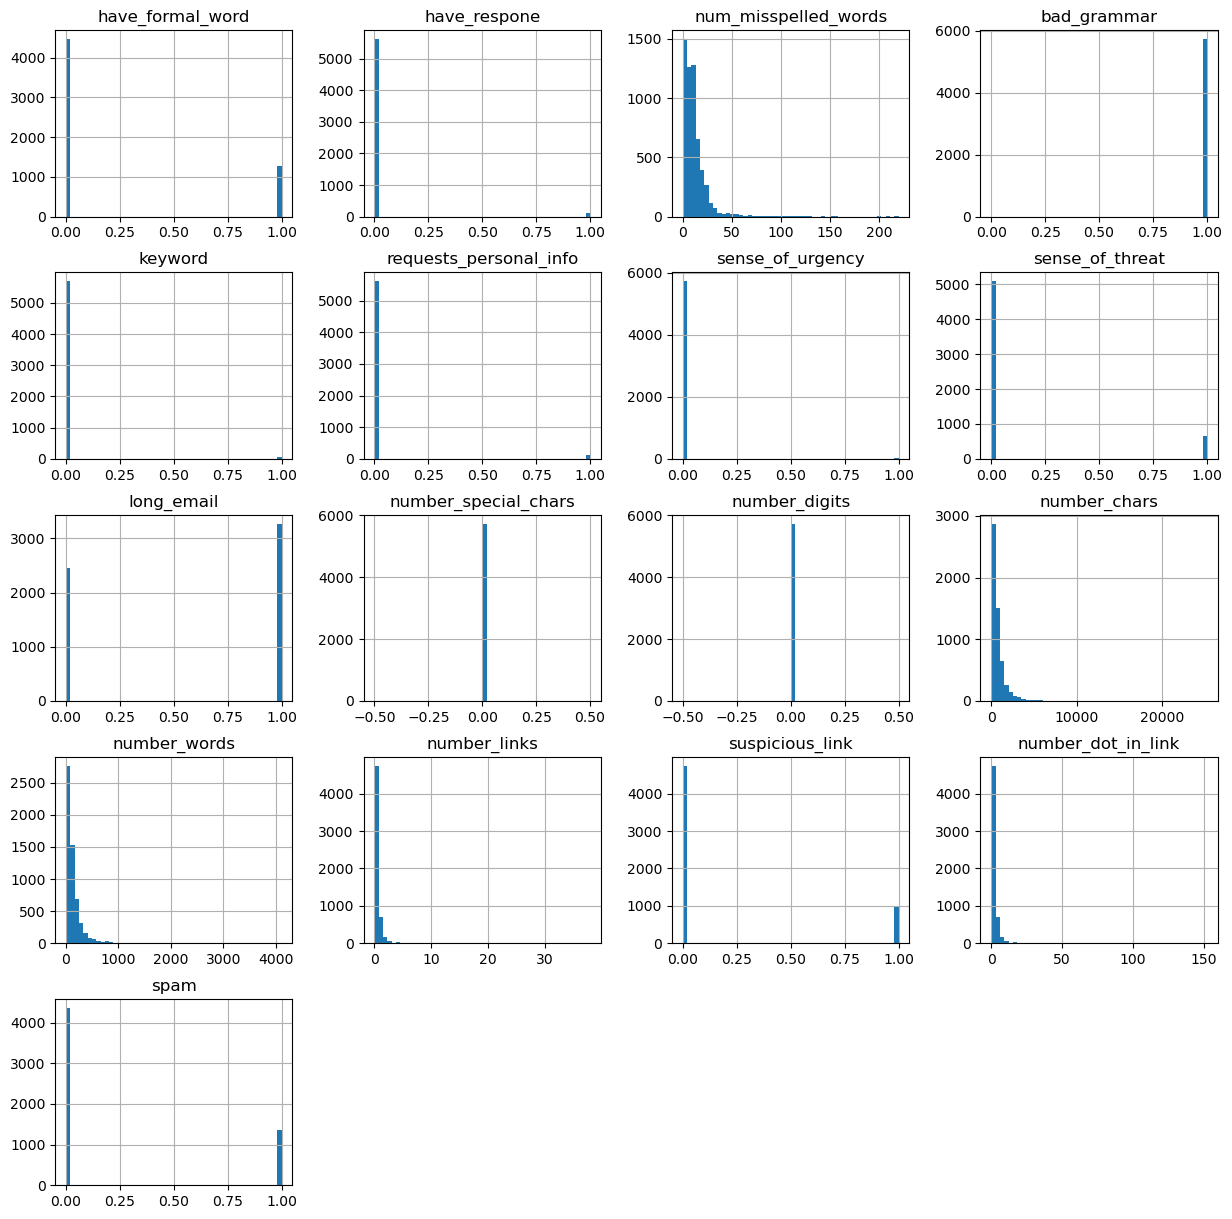

In [24]:
#Plotting the data distribution
df.hist(bins = 50,figsize = (15,15))
plt.show()

In [25]:
# Storing the extracted email fatures to csv file
df.to_csv('email_processed.csv', index= False)

In [26]:
df.shape

(5728, 17)

In [27]:

df.describe()

,have_formal_word,have_respone,num_misspelled_words,bad_grammar,keyword,requests_personal_info,sense_of_urgency,sense_of_threat,long_email,number_special_chars,number_digits,number_chars,number_words,number_links,suspicious_link,number_dot_in_link,spam
count,5728.000000,5728.000000,5728.000000,5728.000000,5728.000000,5728.000000,5728.000000,5728.000000,5728.000000,5728.0,5728.0,5728.000000,5728.000000,5728.000000,5728.000000,5728.000000,5728.000000
mean,0.220496,0.019553,11.654330,0.999651,0.006983,0.020426,0.001920,0.111732,0.571753,0.0,0.0,822.372556,138.347591,0.285789,0.170042,1.143156,0.238827
std,0.414617,0.138471,13.119121,0.018684,0.083281,0.141465,0.043784,0.315064,0.494868,0.0,0.0,1123.182904,181.122094,1.099483,0.375702,4.397934,0.426404
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.0,10.000000,2.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,0.000000,4.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.0,277.000000,48.000000,0.000000,0.000000,0.000000,0.000000
50%,0.000000,0.000000,9.000000,1.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.0,0.0,512.000000,88.000000,0.000000,0.000000,0.000000,0.000000
75%,0.000000,0.000000,15.000000,1.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.0,0.0,971.000000,166.000000,0.000000,0.000000,0.000000,0.000000
max,1.000000,1.000000,220.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,0.0,0.0,25236.000000,4110.000000,38.000000,1.000000,152.000000,1.000000


In [28]:
# import seaborn as sns
# plt.figure(figsize=(15,13))
# sns.heatmap(df.corr())
# plt.show()

In [29]:
#checking the data for null or missing values
df.isnull().sum()

have_formal_word          0
have_respone              0
num_misspelled_words      0
bad_grammar               0
keyword                   0
requests_personal_info    0
sense_of_urgency          0
sense_of_threat           0
long_email                0
number_special_chars      0
number_digits             0
number_chars              0
number_words              0
number_links              0
suspicious_link           0
number_dot_in_link        0
spam                      0
dtype: int64

In [30]:
# shuffling the rows in the dataset so that when splitting the train and test set are equally distributed
df = df.sample(frac=1).reset_index(drop=True)
df.head()

,have_formal_word,have_respone,num_misspelled_words,bad_grammar,keyword,requests_personal_info,sense_of_urgency,sense_of_threat,long_email,number_special_chars,number_digits,number_chars,number_words,number_links,suspicious_link,number_dot_in_link,spam
0,0,0,14,1,0,0,0,0,1,0,0,882,167,1,1,4,0
1,1,0,3,1,0,0,0,0,0,0,0,359,55,0,0,0,0
2,0,0,9,1,0,0,0,0,1,0,0,573,98,0,0,0,0
3,0,0,49,1,0,0,0,0,1,0,0,2487,439,1,1,4,0
4,1,0,22,1,0,0,0,0,1,0,0,1005,183,0,0,0,0


In [31]:
# Sepratating & assigning features and target columns to X & y
y = df['spam']
X = df.drop('spam',axis=1)
X.shape, y.shape

((5728, 16), (5728,))

# 6. Chia dataset thành train set và test set

In [32]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, 
                                                    test_size = 0.2, random_state = 12)
X_train.shape, X_test.shape

((4582, 16), (1146, 16))

# 7. Huấn luyện mô hình học 

## 7.1 KNN

In [33]:
from sklearn.neighbors import KNeighborsClassifier
knn = KNeighborsClassifier(n_neighbors=4)
knn.fit(X_train, y_train) 

KNeighborsClassifier(n_neighbors=4)

In [34]:
y_pred_knn = knn.predict(X_test)

In [35]:
from sklearn import metrics
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score
print('Accuracy score: ', format(accuracy_score(y_pred_knn, y_test))) 
print('Precision score: ', format(precision_score(y_pred_knn,y_test)))
print('Recall score: ', format(recall_score(y_pred_knn,y_test)))
print('F1 score: ', format(f1_score(y_pred_knn,y_test)))  

Accuracy score:  0.8342059336823735
Precision score:  0.420863309352518
Recall score:  0.8013698630136986
F1 score:  0.5518867924528301


## 7.2 SVM

In [36]:
#Import svm model
from sklearn import svm

#Create a svm Classifier
clf = svm.SVC(kernel='linear') # Linear Kernel

#Train the model using the training sets
clf.fit(X_train, y_train)

#Predict the response for test dataset
y_pred = clf.predict(X_test)


In [37]:
#Import scikit-learn metrics module for accuracy calculation

# Model Accuracy: how often is the classifier correct?
print('Accuracy score: ', format(accuracy_score(y_pred, y_test)))
print('Precision score: ', format(precision_score(y_test ,y_pred)))
print('Recall score: ', format(recall_score(y_test ,y_pred)))
print('F1 score: ', format(f1_score(y_test ,y_pred)))


Accuracy score:  0.7635253054101222
Precision score:  0.6129032258064516
Recall score:  0.0683453237410072
F1 score:  0.12297734627831716


In [38]:
from sklearn.naive_bayes import MultinomialNB
naive_bayes = MultinomialNB()
naive_bayes.fit(X_train , y_train) 
predictions = naive_bayes.predict(X_test)


In [39]:
print('Accuracy score: ', format(accuracy_score(predictions,y_test)))
print('Precision score: ', format(precision_score(predictions,y_test)))
print('Recall score: ', format(recall_score(predictions,y_test)))
print('F1 score: ', format(f1_score(predictions,y_test)))

Accuracy score:  0.7120418848167539
Precision score:  0.23741007194244604
Recall score:  0.358695652173913
F1 score:  0.2857142857142857


## 7.3 Naive Bayes 

In [40]:
from sklearn.naive_bayes import GaussianNB
naive_bayes = GaussianNB()
naive_bayes.fit(X_train, y_train)

GaussianNB()

In [41]:
predictions = naive_bayes.predict(X_test)
predictions

array([0, 1, 0, ..., 0, 0, 0], dtype=int64)

In [42]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score
print('Accuracy score: ', format(accuracy_score(predictions,y_test)))
print('Precision score: ', format(precision_score(predictions,y_test)))
print('Recall score: ', format(recall_score(predictions,y_test)))
print('F1 score: ', format(f1_score(predictions,y_test)))

Accuracy score:  0.7338568935427574
Precision score:  0.2517985611510791
Recall score:  0.41916167664670656
F1 score:  0.3146067415730337


## 7.4 Randomforest 

In [43]:
from sklearn.ensemble import RandomForestClassifier
rf = RandomForestClassifier(n_estimators=100,max_depth=9,max_leaf_nodes=9,max_features=None,n_jobs=-1)
rf_model = rf.fit(X_train, y_train)
y_pred_rf=rf_model.predict(X_test)

In [44]:
print("Accuracy:",metrics.accuracy_score(y_test, y_pred_rf))
print('Precision score: ', format(precision_score(y_pred_rf,y_test)))
print('Recall score: ', format(recall_score(y_pred_rf,y_test)))
print('F1 score: ', format(f1_score(y_pred_rf,y_test))) 

Accuracy: 0.7879581151832461
Precision score:  0.23381294964028776
Recall score:  0.6842105263157895
F1 score:  0.34852546916890076


In [46]:
import matplotlib.pyplot as plt
x_labels = ["SVM", "Naive Bayes", "k-NN", "Random Forest"]
accuracy_scores = [accuracy_score(y_test, y_pred ), accuracy_score(predictions,y_test), accuracy_score(y_pred_knn,y_test), accuracy_score(y_pred_rf,y_test)]
precision_scores = [precision_score(y_pred ,y_test), precision_score(predictions,y_test), precision_score(y_pred_knn,y_test), precision_score(y_pred_rf,y_test)]
recall_scores = [recall_score(y_pred ,y_test), recall_score(predictions,y_test), recall_score(y_pred_knn,y_test), recall_score(y_pred_rf,y_test)]
f1_scores = [f1_score(y_pred ,y_test), f1_score(predictions,y_test), f1_score(y_pred_knn,y_test), f1_score(y_pred_rf,y_test)]

(0.0, 1.0)

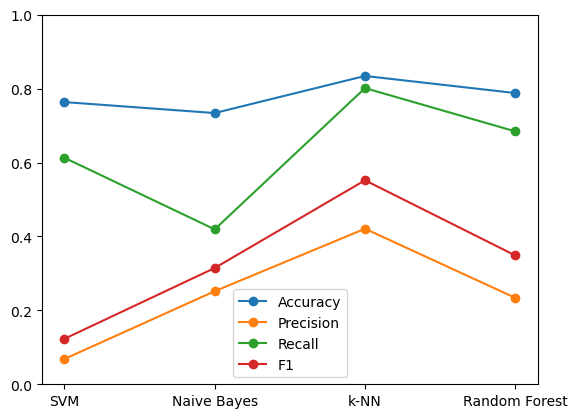

In [47]:
plt.plot(x_labels, accuracy_scores, marker = 'o')
plt.plot(x_labels, precision_scores, marker = 'o')
plt.plot(x_labels, recall_scores, marker = 'o')
plt.plot(x_labels, f1_scores, marker = 'o')
plt.legend(['Accuracy', 'Precision', 'Recall', 'F1'])
plt.ylim([0,1])